# Water Pollution Data (WHO/UNICEF) | 2000-2020
## About Dataset
Context
According to the United Nations, about 4 billion people experience severe water shortages for at least one month a year and around 1.6 billion people - almost a quarter of the world's population - have problems accessing a clean, safe water supply.

On October 29, 2019, thousands of content creators across the world have collaborated to start the project #TeamSeas as an attempt to manage this waste and help reduce pollution.

This dataset aims to talk about this issue and spread awareness by encouraging Data Analysts and Data Scientists on Kaggle to work on this and present their findings.

The dataset can be found at https://www.kaggle.com/datasets/harshjhunjhunwala/water-pollution-data-whounicef-20002021?resource=download 

## Content
This dataset contains data on drinking water, sanitation, and hygiene (2000 - 2020) for several regions in the world as well as aggregate values for the world itself. The data is split into categories of household, schools, and healthcare with some countries having results on inequalities as well



## Research questions
<p>1- How has the global access to clean water and sanitation changed from 2000 to 2020?</p>
<p>2- Can we observe any correlation between the global access to clean water and sanitation?</p>
<p>3-How has been regional access to clean water and sanitation over the years</p>
<p>4-Are there significant inequalities in access to clean water and sanitation within the different regions?</p>
<p>5-How does the access to clean water and sanitation differ between High_income and lowincome regions?</p>

In [59]:
import pandas as pd
import yaml
import numpy as np

#open the config file and load the file into a dataframe 
with open ("config.yaml",'r') as conf_file:
    config=yaml.safe_load(conf_file)

#The df contains regional as well as global information about availabiliyt of 
# clean, safe water 
df =pd.read_csv(config['region_household_water_path'])

#The df contains regional as well as global information anout availabiliyt of 
# sanitation
df_sanit =pd.read_csv(config['region_household_sanitatione_path'])



---

## Data preperation
Remove unnecessary rows and columns from the data farmes and rename the columns

In [2]:


#load the file into a dataframes again to keep original data to refere whenever
#needed
df =pd.read_table(config['region_household_water_path'],delimiter=',')
df_sanit =pd.read_table(config['region_household_sanitatione_path'],delimiter=',')

df_wat = pd.DataFrame()
df_san = pd.DataFrame()

#######################################
#remove unnecessary rows and columns from data farmes and rename the columns
########################################
df_wat['Year']=df['Year']
df_wat['Population']=df['Population \n(thousands)']
df_san['Year']=df_sanit['Year']
df_san['Population']=df_sanit['Population \n(thousands)']

#load the file into a dataframe while skipping the firs row
df =pd.read_table(config['region_household_water_path'],delimiter=',',skiprows=1)
df_wat['REGION']=df['REGION']

df_sanit =pd.read_table(config['region_household_sanitatione_path'],delimiter=',',skiprows=1)
df_san['REGION']=df_sanit['REGION']

#load the file into a dataframe while skipping the two firs rows
df =pd.read_table(config['region_household_water_path'],delimiter=',',skiprows=2)

df_wat['national'] = df['At least basic'].str.replace(">", "")
df_wat['rural'] = df['At least basic.1'].str.replace(">", "")
df_wat['urban'] = df['At least basic.2'].str.replace(">", "")

df_sanit =pd.read_table(config['region_household_sanitatione_path'],delimiter=',',skiprows=2)
df_san['national'] = df_sanit['At least basic'].str.replace(">", "")
df_san['rural'] = df_sanit['At least basic.1'].str.replace(">", "")
df_san['urban'] = df_sanit['At least basic.2'].str.replace(">", "")



df_wat.loc[(df_wat['Year'] == 2020) & (df_wat['REGION'] == 'World'), ['Population', 'REGION', 'national', 'rural','urban']] = [7794799, 'World',90,82,96]

df_san.loc[(df_san['Year'] == 2020) & (df_san['REGION'] == 'World'), ['Population', 'REGION', 'national', 'rural','urban']] = [7794799, 'World',78,66,88]



In [3]:
#inspect water data
df_wat.columns
print(df_wat.head(-10))


       Year    Population                     REGION national rural urban
0       NaN           NaN                        NaN       99    99    99
1       NaN           NaN  Australia and New Zealand       99    99    99
2    2000.0  2.285043e+04  Australia and New Zealand       99    99    99
3    2001.0  2.310262e+04  Australia and New Zealand       99    99    99
4    2002.0  2.336457e+04  Australia and New Zealand       99    99    99
..      ...           ...                        ...      ...   ...   ...
344  2006.0  6.615611e+06                      World       85    75    96
345  2007.0  6.697632e+06                      World       86    75    96
346  2008.0  6.780352e+06                      World       86    76    96
347  2009.0  6.863625e+06                      World       87    76    96
348  2010.0  6.947315e+06                      World       87    77    96

[349 rows x 6 columns]


In [4]:
#inspect sanitation data
df_san.columns
print(df_wat.head(-10))
     

       Year    Population                     REGION national rural urban
0       NaN           NaN                        NaN       99    99    99
1       NaN           NaN  Australia and New Zealand       99    99    99
2    2000.0  2.285043e+04  Australia and New Zealand       99    99    99
3    2001.0  2.310262e+04  Australia and New Zealand       99    99    99
4    2002.0  2.336457e+04  Australia and New Zealand       99    99    99
..      ...           ...                        ...      ...   ...   ...
344  2006.0  6.615611e+06                      World       85    75    96
345  2007.0  6.697632e+06                      World       86    75    96
346  2008.0  6.780352e+06                      World       86    76    96
347  2009.0  6.863625e+06                      World       87    76    96
348  2010.0  6.947315e+06                      World       87    77    96

[349 rows x 6 columns]


## Data Cleaning
The data is not clean. There are empty cells in the dataframe which  to be replaced with NaN's and then interpolated. The type of year, population, andnational,rural, and urban values have been changed for both water and sanitation. For water and sanitaion missing data, my strategy for national, urban and rural was to fill tha missing data with the previous value of the same column supposing that the situation in the related regions has not changed over a year. If the first value of the column is missing, it will remain missing as ffill only propagates values forward. However, I used  the bfill method (backward fill) instead to fill to the both direction in a column. For probable missing year and region's name I deleted data where the year is missing, and for missing population I used linear interpolation.

In [5]:

#replace cells with '-' to NaN
df_wat.replace('-', np.nan, inplace=True)
df_san.replace('-', np.nan, inplace=True) 


#This will return a  DataFrame that contains only the rows where
#  the year is not missingrue)
df_wat = df_wat.dropna(subset=['Year'])
df_san = df_san.dropna(subset=['Year'])

#change year type to integer
df_wat['Year']=df_wat['Year'].astype(int)
df_san['Year']=df_san['Year'].astype(int)

#This will return a  DataFrame that contains only the rows where
#  the year is not missingrue)
df_wat = df_wat.dropna(subset=['REGION'])
df_san = df_san.dropna(subset=['REGION'])

#change year type to string
df_wat['REGION']=df_wat['REGION'].astype(str)
df_san['REGION']=df_san['REGION'].astype(str)


#Interpolating population
df_wat['Population'].fillna(method='ffill', inplace=True)
df_san['Population'].fillna(method='ffill', inplace=True)

#change year type to int
df_wat['Population']=df_wat['Population'].astype(int)
df_san['Population']=df_san['Population'].astype(int)



#to cahnge the type to int
df_wat['national'].fillna(0, inplace=True)
df_wat['rural'].fillna(0, inplace=True)
df_wat['urban'].fillna(0, inplace=True)


df_san['national'].fillna(0, inplace=True)
df_san['rural'].fillna(0, inplace=True)
df_san['urban'].fillna(0, inplace=True)


df_wat['national']=df_wat['national'].astype(int)
df_san['national']=df_san['national'].astype(int)

df_wat['rural']=df_wat['rural'].astype(int)
df_san['rural']=df_san['rural'].astype(int)

df_wat['urban']=df_wat['urban'].astype(int)
df_san['urban']=df_san['urban'].astype(int)





In [6]:
#inspect the data
df_wat.info()
df_san.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 2 to 357
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        356 non-null    int32 
 1   Population  356 non-null    int32 
 2   REGION      356 non-null    object
 3   national    356 non-null    int32 
 4   rural       356 non-null    int32 
 5   urban       356 non-null    int32 
dtypes: int32(5), object(1)
memory usage: 12.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 2 to 357
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        356 non-null    int32 
 1   Population  356 non-null    int32 
 2   REGION      356 non-null    object
 3   national    356 non-null    int32 
 4   rural       356 non-null    int32 
 5   urban       356 non-null    int32 
dtypes: int32(5), object(1)
memory usage: 12.5+ KB


## More data cleaning to draw a plot
First I separated the global data for both sanitation and water. Then, did more data cleaning.
 I did data interpolation here becuase I found out that it yields better results on data set with smaller size.
 Next, two line graphs created to display the changes in population and access to the
 clean water and sanition facilities from 2000 to 2020.

In [7]:

import pandas as pd
import matplotlib.pyplot as plt


# Create global DataFrame
glob_df_wat = df_wat[df_wat.loc[:, 'REGION'] =='World']
glob_san_df = df_san[df_san.loc[:, 'REGION'] =='World']


# more data cleaning
# Data interpolation
glob_df_wat.replace(0, np.nan, inplace=True)
glob_san_df.replace(0, np.nan, inplace=True)


glob_df_wat['national'].interpolate(method='linear', inplace=True)
glob_df_wat['rural'].interpolate(method='linear', inplace=True)
glob_df_wat['urban'].interpolate(method='linear', inplace=True)

glob_san_df['national'].interpolate(method='linear', inplace=True)
glob_san_df['rural'].interpolate(method='linear', inplace=True)
glob_san_df['urban'].interpolate(method='linear', inplace=True)

glob_df_wat.sort_values(by='Year', ascending=True, inplace=True)
glob_san_df.sort_values(by='Year', ascending=True, inplace=True)


C:\Users\Hedieh\AppData\Local\Temp\ipykernel_7504\439233402.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glob_df_wat.replace(0, np.nan, inplace=True)
C:\Users\Hedieh\AppData\Local\Temp\ipykernel_7504\439233402.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glob_san_df.replace(0, np.nan, inplace=True)
C:\Users\Hedieh\AppData\Local\Temp\ipykernel_7504\439233402.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glob_df_wa

In [8]:
print(glob_df_wat)


     Year  Population REGION  national  rural  urban
338  2000     6135796  World      83.0   71.0   95.0
339  2001     6214664  World      83.0   71.0   95.0
340  2002     6294471  World      83.0   72.0   96.0
341  2003     6373635  World      84.0   73.0   96.0
342  2004     6453330  World      84.0   73.0   96.0
343  2005     6533754  World      85.0   74.0   96.0
344  2006     6615610  World      85.0   75.0   96.0
345  2007     6697631  World      86.0   75.0   96.0
346  2008     6780351  World      86.0   76.0   96.0
347  2009     6863624  World      87.0   76.0   96.0
348  2010     6947315  World      87.0   77.0   96.0
349  2011     7041194  World      87.0   78.0   96.0
350  2012     7125827  World      88.0   78.0   96.0
351  2013     7210582  World      88.0   79.0   96.0
352  2014     7295290  World      89.0   80.0   96.0
353  2015     7379796  World      89.0   80.0   96.0
354  2016     7464022  World      89.0   81.0   96.0
355  2017     7547858  World      90.0   81.0 

In [9]:
print(glob_san_df)

     Year  Population REGION  national  rural  urban
338  2000     6135796  World      58.0   38.0   80.0
339  2001     6214664  World      59.0   39.0   80.0
340  2002     6294471  World      60.0   41.0   80.0
341  2003     6373635  World      61.0   42.0   81.0
342  2004     6453330  World      62.0   44.0   81.0
343  2005     6533754  World      64.0   45.0   82.0
344  2006     6615610  World      65.0   47.0   82.0
345  2007     6697631  World      66.0   48.0   83.0
346  2008     6780351  World      67.0   50.0   83.0
347  2009     6863624  World      68.0   52.0   83.0
348  2010     6947315  World      69.0   53.0   84.0
349  2011     7041194  World      71.0   55.0   84.0
350  2012     7125827  World      72.0   57.0   85.0
351  2013     7210582  World      73.0   58.0   85.0
352  2014     7295290  World      74.0   60.0   86.0
353  2015     7379796  World      75.0   62.0   86.0
354  2016     7464022  World      76.0   63.0   87.0
355  2017     7547858  World      77.0   65.0 

## Create the plots

C:\Users\Hedieh\AppData\Local\Temp\ipykernel_7504\4233860454.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax1.plot(x, y_water_rural,'k--', color=color, label=' rural')
C:\Users\Hedieh\AppData\Local\Temp\ipykernel_7504\4233860454.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  ax1.plot(x, y_water_urban,'k:', color=color, label=' urban')
C:\Users\Hedieh\AppData\Local\Temp\ipykernel_7504\4233860454.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax2.plot(x, y_san_rural,'k--' ,color=color, label='rural ')
C:\Users\Hedieh\AppData\Local\Temp\ipykernel_7504\4233860454.py:48: UserWarning: color is redundantly defined by the 'color' keyword a

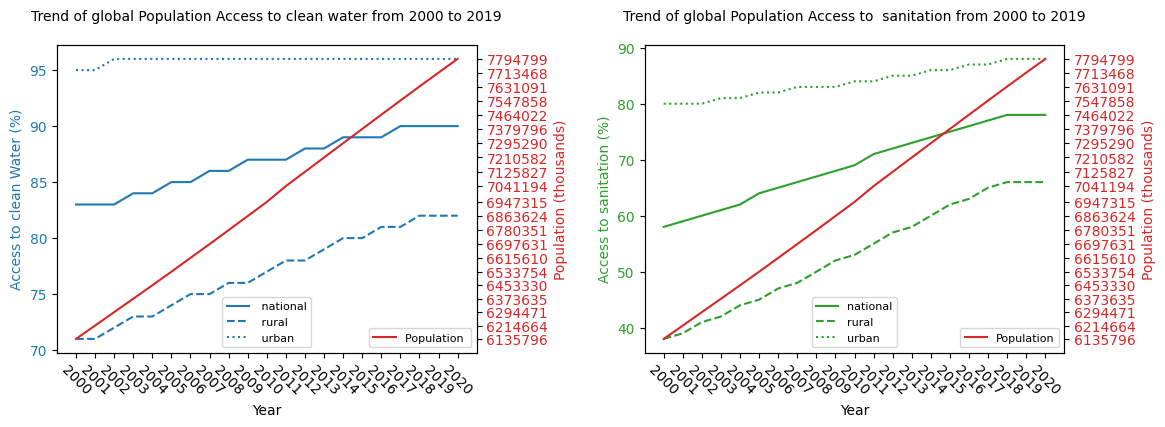

In [10]:


x = glob_df_wat['Year']
y_water_national = glob_df_wat['national']
y_water_rural = glob_df_wat['rural']
y_water_urban = glob_df_wat['urban']

y_pop = glob_df_wat['Population']
y_san_national=glob_san_df['national']
y_san_rural=glob_san_df['rural']
y_san_urban=glob_san_df['urban']



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,4))
fig.subplots_adjust(wspace=0.4) # adjust the width space between the two subplots
# Plot the first figure on ax1
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Access to clean Water (%)', color=color)
#ax1.scatter(x, y_water_national, color=color)
ax1.plot(x, y_water_national, color=color, label=' national')
ax1.plot(x, y_water_rural,'k--', color=color, label=' rural')
ax1.plot(x, y_water_urban,'k:', color=color, label=' urban')

ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(x)
ax1.set_xticklabels(x, rotation=-45)


# a second axes that shares the same x-axis
ax2_1 = ax1.twinx() 
ax2_1.get_yaxis().get_major_formatter().set_scientific(False)
color = 'tab:red'
ax2_1.set_ylabel('Population (thousands)', color=color)  
#ax2_1.scatter(x, y_pop, color=color)
ax2_1.plot(x, y_pop, color=color, label='Population ')
ax2_1.tick_params(axis='y', labelcolor=color)
ax2_1.set_yticks(y_pop)
#ax2_1.legend(loc='upper right')

plt.title('Trend of global Population Access to clean water from 2000 to 2019\n', size=10)
# Plot the second figure on ax2
color = 'tab:green'
ax2.set_xlabel('Year')
ax2.set_ylabel('Access to sanitation (%)', color=color)
#ax2.scatter(x, y_san.astype(str), color=color)
ax2.plot(x, y_san_national, color=color, label='national')
ax2.plot(x, y_san_rural,'k--' ,color=color, label='rural ')
ax2.plot(x, y_san_urban,'k:', color=color, label='urban')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticks(x)
ax2.set_xticklabels(x, rotation=-45,fontsize=10)
#ax2.legend(loc='upper left')

ax2_2 = ax2.twinx() 
ax2_2.get_yaxis().get_major_formatter().set_scientific(False)
color = 'tab:red'
ax2_2.set_ylabel('Population (thousands)', color=color, fontsize=10)  
#ax2_2.scatter(x, y_pop, color=color)
ax2_2.plot(x, y_pop, color=color, label='Population')
ax2_2.tick_params(axis='y', labelcolor=color)
ax2_2.set_yticks(y_pop)
#ax2_2.legend(loc='upper right')

#add the legends
ax1.legend(loc='lower center', fontsize=8)
ax2_1.legend(loc='lower right', fontsize=8)
ax2.legend(loc='lower center', fontsize=8)
ax2_2.legend(loc='lower right', fontsize=8)

plt.title('Trend of global Population Access to  sanitation from 2000 to 2019\n', size=10)
plt.show()

# Question:Can we observe any correlation between the global access to clean water and sanitation?
In this code, a scatterplot is created  to visualize the relationship between the access to drinking water and population . The pearsonr function is then used to calculate Pearson's correlation coefficient and the corresponding p-value.

In [11]:
from scipy.stats import pearsonr

def calc_pearson(x,y):
    #calculate  Pearson's correlation coefficient and the corresponding p-value. 
    correlation, p_value = pearsonr(x, y)
    print("Pearson correlation coefficient:", correlation)
    print("P-value:", p_value)

    if p_value < 0.05:
        print("There is a significant correlation between access to clean water and population growth.")
    else:
        print("There is no significant correlation between access to clean water and population growth.")

    if correlation == 1:
        print("There is a strong positive correlation.")
    elif correlation == -1:
        print("There is a strong negative correlation.")
    elif correlation == 0:
        print("There is no correlation.")
    elif correlation != 0:
        print("There is a positive correlation.")
    else:
        print("There is a negative correlation.") 
         
print('_____________national_______________________________\n')
  
calc_pearson(y_water_national,y_san_national)
print('____________rural________________________________\n')

calc_pearson(y_water_rural,y_san_rural)
print('____________urban________________________________\n')

calc_pearson(y_water_urban,y_san_urban)


_____________national_______________________________

Pearson correlation coefficient: 0.9932546139726738
P-value: 3.0263596215855493e-19
There is a significant correlation between access to clean water and population growth.
There is a positive correlation.
____________rural________________________________

Pearson correlation coefficient: 0.996146756854424
P-value: 1.4981226638634996e-21
There is a significant correlation between access to clean water and population growth.
There is a positive correlation.
____________urban________________________________

Pearson correlation coefficient: 0.47514757972740435
P-value: 0.029499418093632407
There is a significant correlation between access to clean water and population growth.
There is a positive correlation.


## Visualization
To investigate the correlation between two variables visually, I made a plot on the variables,clean water and sanitation, andscatter plot to see if there is a relationship between clean water and sanitation

Distribution of points: If the points are clustered together, it suggests a strong relationship between the variables. If the points are dispersed, it suggests a weak relationship.

Direction of relationship: If the points tend to increase as they move from left to right, it suggests a positive relationship between the variables. If the points decrease as they move from left to right, it suggests a negative relationship.

Strength of relationship: The strength of the relationship can be determined by the amount of scatter in the plot. A small amount of scatter suggests a strong relationship, while a large amount of scatter suggests a weak relationship.

Outliers: Points that lie significantly away from the main pattern of the plot are called outliers and can indicate a departure from the overall relationship between the variables

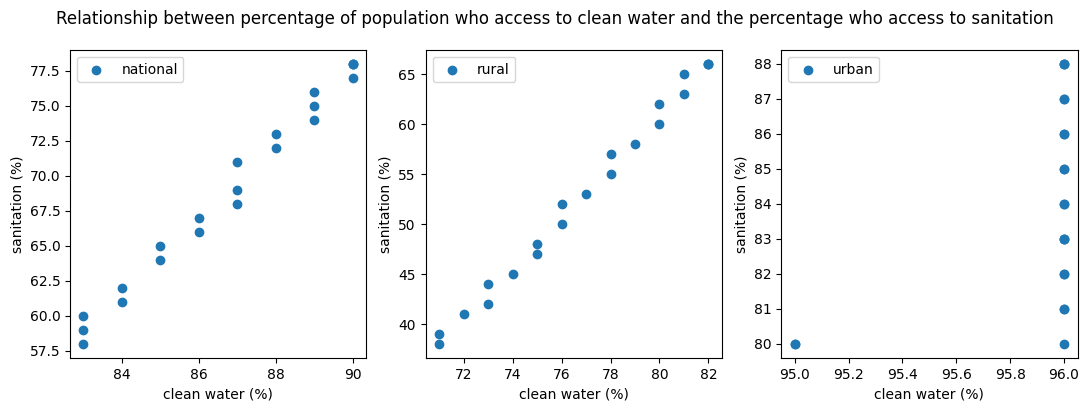

In [12]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(13,4))
# Make a plot of the marginal prior, likelihood and posterior distributions:
ax1.scatter(y_water_national,y_san_national, label='national')
ax1.set_xlabel("clean water (%)")
ax1.set_ylabel("sanitation (%)")
ax1.legend(loc='best')
#ax1.ylim(0,0.8)

ax2.scatter(y_water_rural,y_san_rural, label='rural')
ax2.set_xlabel("clean water (%)")
ax2.set_ylabel("sanitation (%)")
ax2.legend(loc='best')
# ax2.ylim(0,0.8)

ax3.scatter(y_water_urban,y_san_urban, label='urban')
ax3.set_xlabel("clean water (%)")
ax3.set_ylabel("sanitation (%)")
ax3.legend(loc='best')
fig.suptitle('Relationship between percentage of population who access to clean water and the percentage who access to sanitation \n', size=12)
plt.show()

# Question:How has been regional access to clean water and sanitation over the years

## Data cleaning and creating dataframes
Three data frames were created according to 8 main SDG regions (Australia and New Zealand, Central and Southern Asia, Eastern, and South-Eastern Asia,
Europe and Northern America, Latin America and the Caribbean, Northern Africa and Western Asia, Oceania, and Sub-Saharan Africa ) additional to Others which refers to the minor regions together. There is also another data frame according to  SDG's income categories

### Create and clean water data frames 

In [14]:
#Do more data cleaning to create the required data frame 
#the minor regions and income data have been removed from the data
except_list=['World','Small Island Developing States',
                               'Landlocked Developing Countries',
                               'Least Developed Countries','Low-income',
                                'Lower-middle-income','Upper-middle-income',
                                  'High-income','Fragile or Extremely Fragile']

minor_region_list=['Small Island Developing States',
                               'Landlocked Developing Countries',
                               'Least Developed Countries',
                               'Fragile or Extremely Fragile']
income_region_list=['Low-income',
                               'Lower-middle-income','Upper-middle-income',
                               'High-income']

df_wat.replace(np.nan,0, inplace=True)
#SDG main regions data 
df_reg_wat= df_wat[~df_wat['REGION'].isin(except_list)]


#create dataset accordin to income categories
income_reg_wat=df_wat[df_wat['REGION'].isin(income_region_list)]

#to  add  water access for minor regions together  to the main dataframe
# it is done to interpolate abundant null data in the 
# 'Small Island Developing States','Landlocked Developing Countries',
# and 'Least Developed Countries' regions   
minor_reg_wat=df_wat[df_wat['REGION'].isin(minor_region_list)]

#creat minor regions together data frame
for year in range(2000,2021): 
    df_temp=minor_reg_wat[minor_reg_wat['Year']==year]  
    
    new_data = {
    'Year': year,
    'REGION': 'Others',
    'Population': sum(df_temp['Population']),
    'national':(df_temp['national'].mean()),
    'rural':(df_temp['rural'].mean()),
    'urban':(df_temp['urban'].mean()),
    }
    new_df = pd.DataFrame(new_data, index=[0])
    df_reg_wat = pd.concat([df_reg_wat, new_df], ignore_index=True) 


# Data interpolation
df_reg_wat.replace(0, np.nan, inplace=True)
df_reg_wat['national'].interpolate(method='linear', inplace=True)
df_reg_wat['rural'].interpolate(method='linear', inplace=True)
df_reg_wat['urban'].interpolate(method='linear', inplace=True)

income_reg_wat.replace(0, np.nan, inplace=True)
income_reg_wat['national'].interpolate(method='linear', inplace=True)
income_reg_wat['rural'].interpolate(method='linear', inplace=True)
income_reg_wat['urban'].interpolate(method='linear', inplace=True)

C:\Users\Hedieh\AppData\Local\Temp\ipykernel_7504\714021978.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_reg_wat.replace(0, np.nan, inplace=True)
C:\Users\Hedieh\AppData\Local\Temp\ipykernel_7504\714021978.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_reg_wat['national'].interpolate(method='linear', inplace=True)
C:\Users\Hedieh\AppData\Local\Temp\ipykernel_7504\714021978.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

### Create and clean sanitation data frames

In [15]:
df_san.replace(np.nan,0, inplace=True)
#SDG main regions data 
df_reg_san= df_san[~df_san['REGION'].isin(except_list)]


#create dataset accordin to income categories
income_reg_san=df_san[df_san['REGION'].isin(income_region_list)]

#to  add  water access for minor regions together  to the main dataframe
# it is done to interpolate abundant null data in the 
# 'Small Island Developing States','Landlocked Developing Countries',
# and 'Least Developed Countries' regions   
minor_reg_san=df_san[df_san['REGION'].isin(minor_region_list)]

#creat minor regions together data frame


for year in range(2000,2021): 
    df_temp=minor_reg_san[minor_reg_san['Year']==year]  
    
    new_data = {
    'Year': year,
    'REGION': 'Others',
    'Population': sum(df_temp['Population']),
    'national':(df_temp['national'].mean()),
    'rural':(df_temp['rural'].mean()),
    'urban':(df_temp['urban'].mean()),
    }
    new_df = pd.DataFrame(new_data, index=[0])
    df_reg_san = pd.concat([df_reg_san, new_df], ignore_index=True) 


# Data interpolation
df_reg_san.replace(0, np.nan, inplace=True)
df_reg_san['national'].interpolate(method='linear', inplace=True)
df_reg_san['rural'].interpolate(method='linear', inplace=True)
df_reg_san['urban'].interpolate(method='linear', inplace=True)

income_reg_san.replace(0, np.nan, inplace=True)
income_reg_san['national'].interpolate(method='linear', inplace=True)
income_reg_san['rural'].interpolate(method='linear', inplace=True)
income_reg_san['urban'].interpolate(method='linear', inplace=True)

C:\Users\Hedieh\AppData\Local\Temp\ipykernel_7504\2459563868.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_reg_san.replace(0, np.nan, inplace=True)
C:\Users\Hedieh\AppData\Local\Temp\ipykernel_7504\2459563868.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_reg_san['national'].interpolate(method='linear', inplace=True)
C:\Users\Hedieh\AppData\Local\Temp\ipykernel_7504\2459563868.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [16]:
#inspect the data
#inspect the data
print(income_reg_wat)
print(df_reg_wat)

     Year  Population       REGION  national  rural  urban
169  2020     1094365   Low-income        42     29     76
170  2000      395568   Low-income        43     30     76
171  2001      406675   Low-income        44     31     77
172  2002      418245   Low-income        45     32     77
173  2003      430231   Low-income        45     33     77
..    ...         ...          ...       ...    ...    ...
248  2015     1188496  High-income        99     99     99
249  2016     1194368  High-income        99     99     99
250  2017     1199965  High-income        99     99     99
251  2018     1205242  High-income        99     99     99
252  2019     1210133  High-income        61     49     84

[84 rows x 6 columns]
     Year  Population                     REGION  national  rural  urban
0    2000       22850  Australia and New Zealand     99.00  99.00  99.00
1    2001       23102  Australia and New Zealand     99.00  99.00  99.00
2    2002       23364  Australia and New Zealand  

In [17]:

#inspect the data
print(income_reg_san.info())
print(df_reg_san.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 169 to 252
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        84 non-null     int32 
 1   Population  84 non-null     int32 
 2   REGION      84 non-null     object
 3   national    84 non-null     int32 
 4   rural       84 non-null     int32 
 5   urban       84 non-null     int32 
dtypes: int32(5), object(1)
memory usage: 3.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        188 non-null    int64  
 1   Population  188 non-null    int64  
 2   REGION      188 non-null    object 
 3   national    188 non-null    float64
 4   rural       169 non-null    float64
 5   urban       169 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 8.9+ KB
None


In [18]:

#inspect the data
print(income_reg_wat.info())
print(df_reg_wat.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 169 to 252
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        84 non-null     int32 
 1   Population  84 non-null     int32 
 2   REGION      84 non-null     object
 3   national    84 non-null     int32 
 4   rural       84 non-null     int32 
 5   urban       84 non-null     int32 
dtypes: int32(5), object(1)
memory usage: 3.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        188 non-null    int64  
 1   Population  188 non-null    int64  
 2   REGION      188 non-null    object 
 3   national    188 non-null    float64
 4   rural       188 non-null    float64
 5   urban       188 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 8.9+ KB
None


## visualization
Two  plots were created to show regional access to clean water and sanitation per year, 
in addition to a plot for reginal water and sanitation according to income categories .
The plots are interactive as they show the changes using a slider taht slide from 2000 to 2020.
in this code  draw_plot and draw_plot_san, which are used to create two bar charts that represent the access to clean water and sanitation in eight main SDG regions, respectively. Both functions take a year parameter, which is used to filter the data for that year. The data for the bar charts is stored in two dataframes: df_reg_wat and df_reg_san. The draw_plot function uses the ColumnDataSource method to create a bar chart that displays the access to clean water in each of the eight regions. 
The draw_plot_san function is similar to the draw_plot function, with the difference that it displays the access to sanitation in each region. 
In addition to these two functions, there is another function named draw_plot_income_water that is similar to the first two functions, but it considers the region's income categories instead of the regions. This function uses the data stored in the income_reg_wat dataframe

In [46]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import column
from ipywidgets import interact, IntSlider, Select, Layout, HBox, VBox
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.layouts import row
# Enable display of Bokeh plots in the notebook
output_notebook()



blue_colors=['#00BFFF','#87CEEB','#1E90FF','#ADD8E6','#6495ED','#4682B4',
          '#0077BE','#7B68EE','#007FFF']
green_colors = ['#00FF7F', '#90EE90', '#32CD32', '#228B22', '#008000', 
                '#7FFF00', '#ADFF2F', '#006400', '#66CDAA']

############################################################################ 
def draw_plot(year,select):
    """
     function draws plot for acces to clean water in 
     8 main SDG regions 

    """
    # Get the unique regions in the data
    x_list = sorted(list(set(df_reg_wat['REGION'])))

    year_df = df_reg_wat[df_reg_wat['Year'] == year]
    year_df=sorted(year_df)

    source1= ColumnDataSource(data=dict(REGION=year_df['REGION'] ,
     Access_to_CleanWater=year_df[select], color=blue_colors))

    # Create the bar chart
    p = figure(x_range=x_list, y_range=(0, 100), plot_height=350,
                title='Access to Drinking Water per Region in ' + str(year),
            toolbar_location=None, tools="")

    p.vbar(x='REGION', top='Access_to_CleanWater', width=0.7,
            source=source1, color='color')

    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    p.y_range.end = 100
    p.xaxis.major_label_orientation = 1
    p.xaxis.axis_label = "Region"
    p.yaxis.axis_label = "Access to Drinking Water (%)"

   
    # Add the labels on top of the bars
    # labels = LabelSet(x='REGION', y='Access_to_CleanWater',
    #                    text='Access_to_CleanWater', level='glyph',
    #           x_offset=-13.5, y_offset=0, source=source1, render_mode='canvas')
    return p
############################################################################
def draw_plot_san(year,select):

    """
     function draws plot for acces to clean sanitatin in 
     8 main SDG regions 
     
    """
    # Get the unique regions in the data
    x_list = sorted(list(set(df_reg_wat['REGION'])))

    year_df = df_reg_san[df_reg_san['Year'] == year]
    
    source2 = ColumnDataSource(data=dict(REGION=year_df['REGION'] ,
     Access_to_sanitation=year_df[select], color=green_colors))

    # Create the bar chart
    p = figure(x_range=x_list, y_range=(0, 100), plot_height=350,
                title='Access to sanitation per Region in ' + str(year),
            toolbar_location=None, tools="")

    p.vbar(x='REGION', top='Access_to_sanitation', 
           width=0.7, source=source2, color='color')

    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    p.y_range.end = 100
    p.xaxis.major_label_orientation = 1
    p.xaxis.axis_label = "Region"
    p.yaxis.axis_label = "Access to sanitation (%)"

   
    # Add the labels on top of the bars
    # labels = LabelSet(x='REGION', y='Access_to_sanitation',
    #                    text='Access_to_sanitation', level='glyph',
    #           x_offset=-13.5, y_offset=0, source=source2, render_mode='canvas')
    return p


def draw_all_plots(year,select):
    

    p1 = draw_plot(year,select)
    p2 = draw_plot_san(year,select)
   
    show(row(p1, p2))

def main():
    
    select = Select(title="Population Type:", value='national', options=['national','rural','urban'], 
                 description='Select population type:', layout=Layout(height='auto', width='500', align_items='center'))

    slider = IntSlider(min=2000, max=2020, step=1, description='Year:', readout_format='d', 
                   layout=Layout(height='auto', width='1000', align_items='center'))

    interact(draw_all_plots, year=slider, select=select)

    
if __name__ == "__main__":
    main()

Loading BokehJS ...

interactive(children=(IntSlider(value=2000, description='Year:', layout=Layout(align_items='center', height='a…

# Question:How does the access to clean water and sanitation differ between High_income and low_income regions?

## visualization
 These two functions, draw_plot_income_water and draw_plot_income_san, are similar to the first two above functions, but they consider the region's income categories instead of the regions.

In [51]:
# Enable display of Bokeh plots in the notebook
output_notebook()
  
def draw_plot_income_water(year,select):
    
    """
     function draws plot for acces to clean water considering
     region's income categories
     
    """
    # Get the unique regions in the data
    x_list = sorted(list(set(income_reg_wat['REGION'])))
    
    year_df = income_reg_wat[income_reg_wat['Year'] == year]

    source1 = ColumnDataSource(data=dict(REGION=year_df['REGION'] ,
     Access_to_cleanWater=year_df[select], 
     color=['#00BFFF','#87CEEB','#1E90FF','#ADD8E6']))

    # Create the bar chart
    p = figure(x_range=x_list, y_range=(0, 100), plot_height=350,
                title='Access to clean water per income category in '
                  + str(year),toolbar_location=None, tools="")

    p.vbar(x='REGION', top='Access_to_cleanWater', width=0.4,
            source=source1, color='color')

    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    p.y_range.end = 100
    p.xaxis.major_label_orientation = 1
    p.xaxis.axis_label = "Income"
    p.yaxis.axis_label = "Access to clean water (%)"

   
    # Add the labels on top of the bars
    labels = LabelSet(x='REGION', y='Access_to_cleanWater',
                       text='Access_to_clean', level='glyph',
              source=source1, render_mode='canvas')
    return p
############################################################################
def draw_plot_income_san(year,select):
    
    """
     function draws plot for acces to sanitation considering
     region's income categories
     
    """
    # Get the unique regions in the data
    x_list = sorted(list(set(income_reg_san['REGION'])))
    
    year_df = income_reg_san[income_reg_san['Year'] == year]

    source2 = ColumnDataSource(data=dict(REGION=year_df['REGION'] ,
     Access_to_sanitation=year_df[select], 
     color=['#00FF7F', '#90EE90', '#32CD32', '#228B22']))

    # Create the bar chart
    p = figure(x_range=x_list, y_range=(0, 100), plot_height=350,
                title='Access to sanitation per income category in '
                  + str(year),toolbar_location=None, tools="")

    p.vbar(x='REGION', top='Access_to_sanitation', width=0.4, source=source2, 
           color='color')

    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    p.y_range.end = 100
    p.xaxis.major_label_orientation = 1
    p.xaxis.axis_label = "Incom"
    p.yaxis.axis_label = "Access to sanitation (%)"

   
    # Add the labels on top of the bars
    labels = LabelSet(x='REGION', y='Access_to_sanitation',
                       text='Access_to_sanitation', level='glyph',
               source=source2, render_mode='canvas')
    return p

def draw_all_plots(year,select):
    

    p1= draw_plot_income_water(year,select)
    p2= draw_plot_income_san(year,select)
    show(row(p1, p2))
    

def main():
    
    select = Select(title="Population Type:", value='national',
                     options=['national','rural','urban'], 
                     description='Select population type:', 
                     layout=Layout(height='auto', width='500',
                                    align_items='center'))

    slider = IntSlider(min=2000, max=2020, step=1, description='Year:',
                        readout_format='d',
                          layout=Layout(height='auto', 
                                        width='1000', align_items='center'))

    interact(draw_all_plots, year=slider, select=select)

    
if __name__ == "__main__":
    main()
 

Loading BokehJS ...

interactive(children=(IntSlider(value=2000, description='Year:', layout=Layout(align_items='center', height='a…

## Statistics
To statistically investigating the difference between high and low incom regions, the t-test can be used to determine if high-income regions and the low-income regions, are equal accorfding to the means of access to the clean water and sanitation, or not. The variables of interest would be access to clean water and access to sanitation.

To perform a t-test, I first  separated the data for high-income regions and low-income regions, and then calculated the mean for each group for the access to clean water and access to sanitation. Then, I would use a t-test to compare the means between the two groups and calculate a p-value. A p-value of less than 0.05 would indicate that the differences between the two groups are statistically significant.

A t-test assumes that the data is normally distributed and that the variances of the two groups are equal. If these assumptions are not met, alternative tests, such as a Welch's t-test or a Mann-Whitney U test, may need to be used.

### Histograms

In [52]:
def hist_plot(y1_law,y1_high,y2_law,y2_high):

    #print('mean = {:.4g}, variance = {:.4g}'.format(y_av_law_wat, m2_law_wat))
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(13,4))

    #Draw His plot for clean water in low/high incom regions
    my_bins = np.arange(30,85, 5)

    # Make histograms of water access in low_income and  high_income regions:
    ax1.hist(x=y1_law, density=True,
            bins=my_bins, 
            color='pink',alpha=0.50, rwidth=1, label='low incom ')
    ax1.hist(x=y1_high, density=True,
            bins=my_bins, 
            color='blue',alpha=0.50, rwidth=1, label='high income)')
    ax1.grid(axis='y', alpha=0.5)
    ax1.set_xlabel('population, $y$ (%)')
    ax1.set_ylabel('Probability $f(y)$')
    ax1.set_title('Histogram of access to clean water')
    ax1.legend(loc='best')

    #Draw His plot for sanitation in low/high incom regions
    my_bins = np.arange(0,50, 5)

    # Make histograms of water access in low_income and  high_income regions:
    ax2.hist(x=y2_law, density=True,
            bins=my_bins, 
            color='pink',alpha=0.50, rwidth=1, label='low incom ')
    ax2.hist(x=y2_high, density=True,
            bins=my_bins, 
            color='blue',alpha=0.50, rwidth=1, label='high income)')
    ax2.grid(axis='y', alpha=0.5)
    ax2.set_xlabel('population, $y$ (%)')
    ax2.set_ylabel('Probability $f(y)$')
    ax2.set_title('Histogram of access to sanitation)')
    ax2.legend(loc='best')


In [53]:
def DS_Q_Q_parameters(y, est = 'ML'):
    """
    *
    Function DS_Q_Q_Plot(y, est = 'preset', **kwargs)
    
       This function makes a normal quantile-quantile plot (Q-Q-plot), also known
       as a probability plot, to visually check whether data follow a normal distribution.
    
    Requires:            - 
    
    Arguments:
      y                  data array
      est                Estimation method for normal parameters mu and sigma:
                         either 'robust' (default), or 'ML' (Maximum Likelihood),
                         or 'preset' (given values)
      N.B. If est='preset' than the *optional* parameters mu, sigma must be provided:
      mu                 preset value of mu
      sigma              preset value of sigma
      
    Returns:
      Estimated mu, sigma, n, and expected number of datapoints outside CI in Q-Q-plot.
      Q-Q-plot
      
    Author:            M.E.F. Apol
    Date:              2020-01-06, revision 2022-08-30
    """
    
   
    from scipy.stats import iqr # iqr is the Interquartile Range function

    
    
    n = len(y)
    
    # Calculate order statistic:
    y_os = np.sort(y)
  
    # Estimates of mu and sigma:
    # ML estimates:
    mu_ML = np.mean(y)
    sigma2_ML = np.var(y)
    sigma_ML = np.std(y) # biased estimate
    s2 = np.var(y, ddof=1)
    s = np.std(y, ddof=1) # unbiased estimate
    # Robust estimates:
    mu_R = np.median(y)
    sigma_R = iqr(y)/1.349

    # Assign values of mu and sigma for z-transform:
    if est == 'ML':
        mu, sigma = mu_ML, s
    elif est == 'robust':
        mu, sigma = mu_R, sigma_R
   
    else:
        print('Wrong estimation method chosen!')
        return()
        
    
    # Expected number of deviations (95% confidence level):
    n_dev = np.round(0.05*n)
    
   
         
    # Perform z-transform: sample quantiles z.i
    z_i = (y_os - mu)/sigma

    # Calculate cumulative probabilities p.i:
    i = np.array(range(n)) + 1
    p_i = (i - 0.5)/n

    # Calculate theoretical quantiles z.(i):
    from scipy.stats import norm
    z_th = norm.ppf(p_i, 0, 1)

    # Calculate SE or theoretical quantiles:
    SE_z_th = (1/norm.pdf(z_th, 0, 1)) * np.sqrt((p_i * (1 - p_i)) / n)

    # Calculate 95% CI of diagonal line:
    CI_upper = z_th + 1.96 * SE_z_th
    CI_lower = z_th - 1.96 * SE_z_th
    return z_th, z_i, CI_upper,CI_lower,mu, sigma


In [54]:
def DS_Q_Q_plots(y1_low,y1_high,y2_low,y2_high) :

    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(13,4) )
 
    z_th, z_i, CI_upper,CI_lower,mu,sigma=DS_Q_Q_parameters(y1_low, est = 'ML')
    # Make first Q-Q plots:
    ax1.plot(z_th, z_i, 'o', color='k', label='clean water')
    ax1.plot(z_th, z_th, '--', color='r', label='normal line')
    ax1.plot(z_th, CI_upper, '--', color='b', label='95% CI')
    ax1.plot(z_th, CI_lower, '--', color='b')
    ax1.set_xlabel('Theoretical quantiles, $z_{(i)}$')
    ax1.set_ylabel('Sample quantiles, $z_i$')
    ax1.set_title('low_income\n  mu = {:.4g}, sigma = {:.4g}'.format(mu,sigma))
    ax1.legend(loc='best')

    z_th, z_i, CI_upper,CI_lower,mu,sigma=DS_Q_Q_parameters(y1_high, est = 'ML')
    # Make second  Q-Q plots:
    ax2.plot(z_th, z_i, 'o', color='k', label='clean water')
    ax2.plot(z_th, z_th, '--', color='r', label='normal line')
    ax2.plot(z_th, CI_upper, '--', color='b', label='95% CI')
    ax2.plot(z_th, CI_lower, '--', color='b')
    ax2.set_xlabel('Theoretical quantiles, $z_{(i)}$')
    ax2.set_ylabel('Sample quantiles, $z_i$')
    ax2.set_title('high_income\n  mu = {:.4g}, sigma = {:.4g}'.format(mu,sigma))
    ax2.legend(loc='best')

    z_th, z_i, CI_upper,CI_lower,mu,sigma=DS_Q_Q_parameters(y2_low, est = 'ML')
    # Make third  Q-Q plots:
    ax3.plot(z_th, z_i, 'o', color='k', label='sanitation')
    ax3.plot(z_th, z_th, '--', color='r', label='normal line')
    ax3.plot(z_th, CI_upper, '--', color='b', label='95% CI')
    ax3.plot(z_th, CI_lower, '--', color='b')
    ax3.set_xlabel('Theoretical quantiles, $z_{(i)}$')
    ax3.set_ylabel('Sample quantiles, $z_i$')
    ax3.set_title('low_income\n  mu = {:.4g}, sigma = {:.4g}'.format(mu,sigma))
    ax3.legend(loc='best')

    z_th, z_i, CI_upper,CI_lowe,mu,sigmar=DS_Q_Q_parameters(y2_high, est = 'ML')
    # Make forth  Q-Q plots:
    ax4.plot(z_th, z_i, 'o', color='k', label='sanitation')
    ax4.plot(z_th, z_th, '--', color='r', label='normal line')
    ax4.plot(z_th, CI_upper, '--', color='b', label='95% CI')
    ax4.plot(z_th, CI_lower, '--', color='b')
    ax4.set_xlabel('Theoretical quantiles, $z_{(i)}$')
    ax4.set_ylabel('Sample quantiles, $z_i$')
    ax4.set_title('high_income\n  mu = {:.4g}, sigma = {:.4g}'.format(mu,sigma))
    ax4.legend(loc='best')

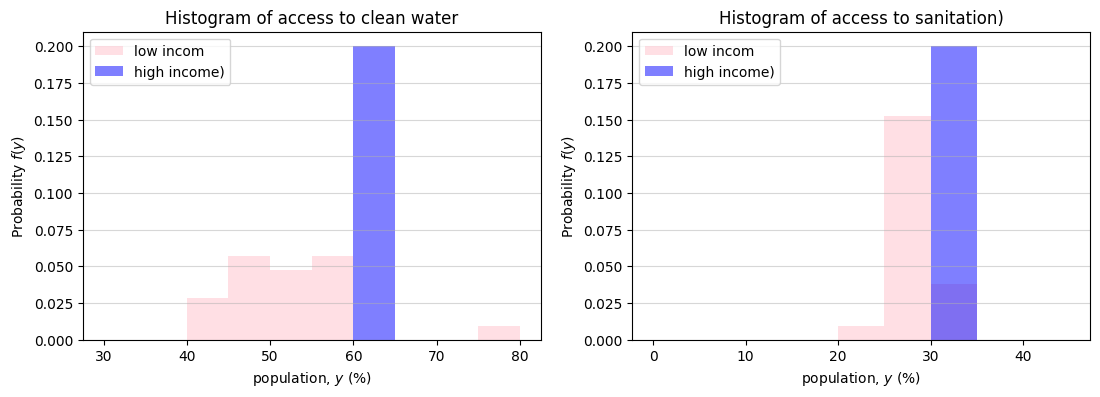

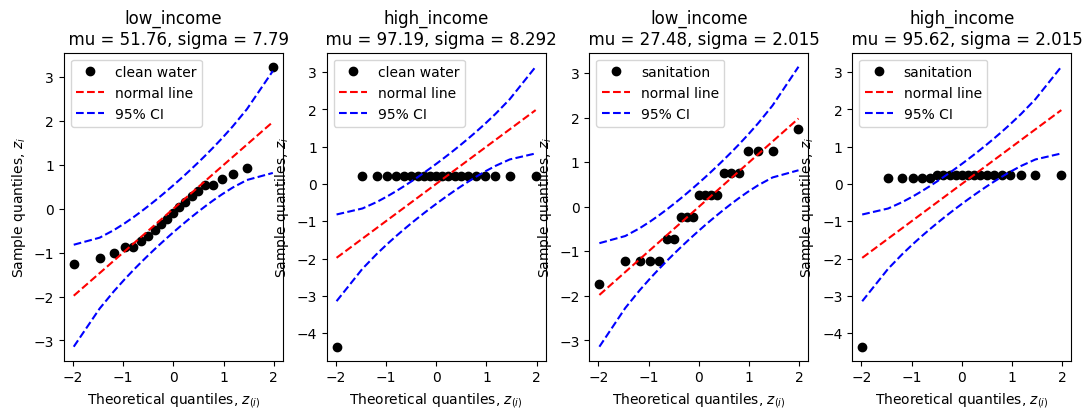

In [56]:
# Data preperation for water
Low_income_reg_wat=income_reg_wat[income_reg_wat['REGION'] == 'Low-income']
low_list=list(Low_income_reg_wat['national'])

High_income_reg_wat=income_reg_wat[income_reg_wat['REGION'] == 'High-income']
High_list=list(High_income_reg_wat['national'])

y1_law = np.array(low_list)
y1_high=np.array(High_list)


y_av_law_wat = np.mean(y1_law)
m2_law_wat = np.var(y1_law, ddof=0)

y_av_high_wat = np.mean(y1_high)
m2_high_wat = np.var(y1_high, ddof=0)

# Data preperation for sanitation
Low_income_reg_san=income_reg_san[income_reg_san['REGION'] == 'Low-income']
low_list=list(Low_income_reg_san['national'])

High_income_reg_san=income_reg_san[income_reg_san['REGION'] == 'High-income']
High_list=list(High_income_reg_san['national'])

y2_law = np.array(low_list)
y2_high=np.array(High_list)

y_av_law_san = np.mean(y2_law)
m2_law_san = np.var(y1_law, ddof=0)

y_av_high_san = np.mean(y2_high)
m2_high_san = np.var(y2_high, ddof=0)

hist_plot(y1_law,y1_high,y2_law,y2_high)

#fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(13,4))
DS_Q_Q_plots(y1_law,y1_high,y2_law,y2_high)


I used Kruskal-Wallis test becuse as you see above data is not normalize and varainces are far different so, T-test seems that not a proper test for these datasets. The kruskal test takes two or more arrays as input and performs the Kruskal-Wallis test. The function returns two values: the Kruskal-Wallis statistic and the p-value. If the p-value is less than a predetermined significance level (such as 0.05), you can conclude that there is a significant difference in the medians of the groups. The two-sided test compares the medians of all groups against each other, so it can determine if any group has a different median, not just if one group has a higher or lower median than the others. Before I tried to transform  data  to normal data using different functions such as Logarithmic Transformation, bout the histtograms showed that dataalredy is not normal.

### Investigating Access to clean water  between High_income and low_income regions

In [57]:
# Kruskal-Wallis test test for water
import numpy as np
from scipy.stats import kruskal


high_income =np.array(y1_law)
low_income = np.array(y1_high)

# Combine the data into a single array
data = np.concatenate([high_income, low_income])

# Create a label array to identify the groups
groups = [1] * len(high_income) + [2] * len(low_income)

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(high_income, low_income)


statistic, p_value = kruskal(high_income, low_income)
print('p_value = {:.4g}'.format(p_value))

if p_value<0.05:
    print (' Access to clean water differs significantly between High_income and low_income regions')
else:
    print (' Access to clean water does not differ significantly between High_income and low_income regions')

p_value = 5.03e-09
 Access to clean water differs significantly between High_income and low_income regions


### Investigating Access to sanitation between High_income and low_income regions

In [58]:
# Kruskal-Wallis test test for sanitation
import numpy as np
from scipy.stats import kruskal


high_income =np.array(y2_law)
low_income = np.array(y2_high)

# Combine the data into a single array
data = np.concatenate([high_income, low_income])

# Create a label array to identify the groups
groups = [1] * len(high_income) + [2] * len(low_income)

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(high_income, low_income)


statistic, p_value = kruskal(high_income, low_income)
print('p_value = {:.4g}'.format(p_value))

if p_value<0.05:
    print (' Access to sanitation differs significantly between High_income and low_income regions')
else:
    print (' Access to csanitation does not differ significantly between High_income and low_income regions')
    

p_value = 1.271e-08
 Access to sanitation differs significantly between High_income and low_income regions
